# Sensitive Data classification for the Images
## This model run in google colab https://colab.research.google.com/

In [ ]:
import tensorflow as tf
import json
import os
import random
import numpy
import matplotlib.pyplot as plot
import matplotlib.image as matimage
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imgData
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
image_folder = "/content/Sensitive_image_classification"
if os.path.exists(image_folder) != True:
  !git clone https://github.com/demoproject-sensitive/Sensitive_image_classification

image_training = image_folder + "/dataset_images/image_training"
image_validation = image_folder + "/dataset_images/image_validation"
sensitive_training = os.path.join(image_training + "/image_sensitive")
nonsensitive_training = os.path.join(image_training + "/image_nonsensitive")
sensitive_validation = os.path.join(image_validation + "/image_sensitive")
nonsensitive_validation = os.path.join(image_validation + "/image_nonsensitive")

Cloning into 'Sensitive_image_classification'...
remote: Enumerating objects: 754, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 754 (delta 15), reused 6 (delta 0), pack-reused 709
Receiving objects: 100% (754/754), 95.38 MiB | 6.98 MiB/s, done.
Resolving deltas: 100% (16/16), done.


## Training Sample Dataset

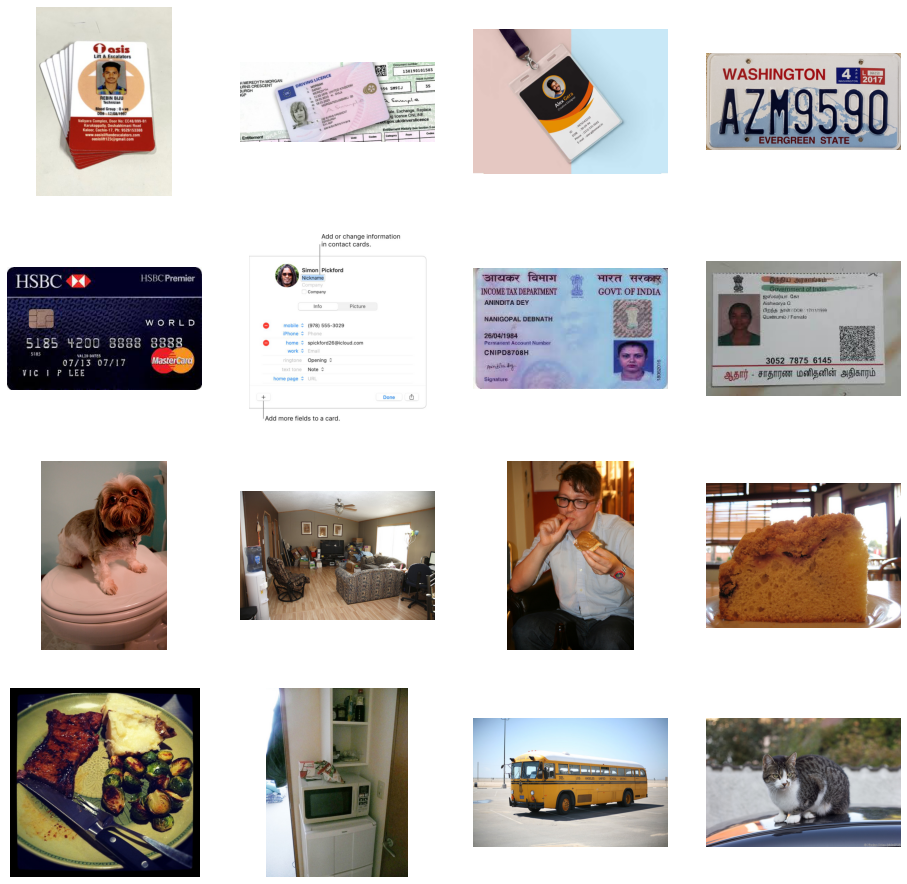

In [ ]:
%matplotlib inline



no_rows = 4
no_cols = 4
figure = plot.gcf()
figure.set_size_inches(no_cols * 4, no_rows * 4)

index = 0

list_training_sensitive = os.listdir(sensitive_training)
list_training_nonsensitive = os.listdir(nonsensitive_training)

index += 8
sens_images = [os.path.join(sensitive_training, fname) 
                for fname in list_training_sensitive[index-8:index]]
nonsens_images = [os.path.join(nonsensitive_training, fname) 
                for fname in list_training_nonsensitive[index-8:index]]

for val, path in enumerate(sens_images+nonsens_images):
  sub_pot = plot.subplot(no_rows, no_cols, val + 1)
  sub_pot.axis('Off')

  image = matimage.imread(path)
  plot.imshow(image)

plot.show()

## CallBack function


In [ ]:
no_epochs = 500
ACCURACY = 0.99
class myEpoch(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > ACCURACY:
      print(" Accurracy is 0.99 then cancel the epoch")
      self.model.stop_training = True

epoch_callbacks = myEpoch()

## Model

In [ ]:

image_model = tf.keras.models.Sequential([
 
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),

  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

image_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])


image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Valdation and Training Dataset Augmentation and  model fitting, 

In [ ]:

dataset_train = imgData(rescale=1/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
validation_datagen = imgData(rescale=1/255)

gen_training = dataset_train.flow_from_directory(
        image_training,
        target_size=(150, 150),
        batch_size=30,
        class_mode='binary',
        shuffle=True
       )

validation_generator = validation_datagen.flow_from_directory(
        image_validation,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary',
        shuffle=True
        )


data_his = image_model.fit(
      gen_training,
      steps_per_epoch=10,
      epochs=no_epochs,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[epoch_callbacks])

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/500
10/10 [==============================] - 16s 374ms/step - loss: 0.6906 - acc: 0.5933 - val_loss: 0.6015 - val_acc: 0.6250
Epoch 2/500
10/10 [==============================] - 4s 359ms/step - loss: 0.5941 - acc: 0.6767 - val_loss: 0.5186 - val_acc: 0.7250
Epoch 3/500
10/10 [==============================] - 4s 361ms/step - loss: 0.5240 - acc: 0.7667 - val_loss: 0.3076 - val_acc: 0.9000
Epoch 4/500
10/10 [==============================] - 3s 341ms/step - loss: 0.5108 - acc: 0.7667 - val_loss: 0.3275 - val_acc: 0.9250
Epoch 5/500
10/10 [==============================] - 4s 358ms/step - loss: 0.4811 - acc: 0.7800 - val_loss: 0.2935 - val_acc: 0.8500
Epoch 6/500
10/10 [==============================] - 4s 362ms/step - loss: 0.4882 - acc: 0.7733 - val_loss: 0.3120 - val_acc: 0.9500
Epoch 7/500
10/10 [==============================] - 4s 354ms/step - loss: 0.4955 - acc: 0.7500 - val_loss: 0.2787 - va

## Plotting Accuracy and Loss graph for Image Model

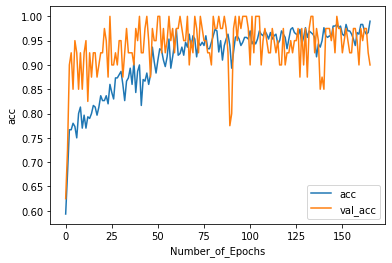

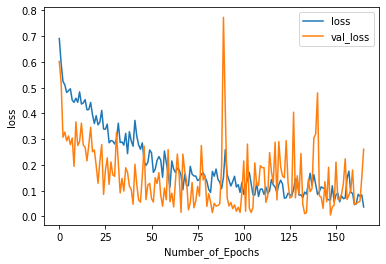

In [ ]:
def graphsPlot(data_his, str):
  plot.plot(data_his.history[str])
  plot.plot(data_his.history['val_'+str])
  plot.xlabel("Number_of_Epochs")
  plot.ylabel(str)
  plot.legend([str, 'val_'+str])
  plot.show()
  
graphsPlot(data_his, "acc")
graphsPlot(data_his, "loss")

## Ploting the Confusion Matrix for Image model

Accuracy for 25 Image Data =  64.0
Accuracy for 50 Image Data =  59.183673469387756
Accuracy for 75 Image Data =  58.666666666666664
Accuracy for 100 Image Data =  56.56565656565656


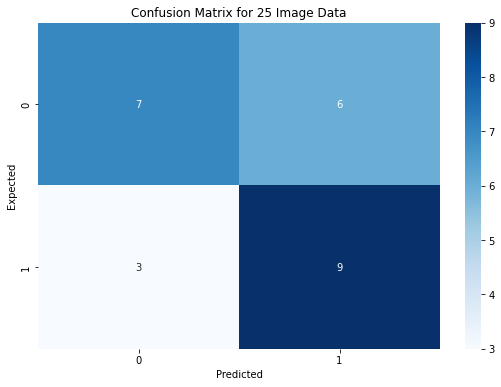

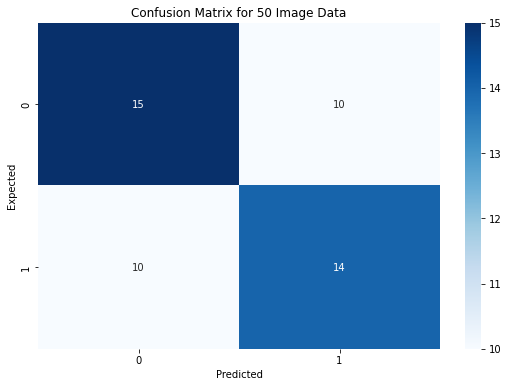

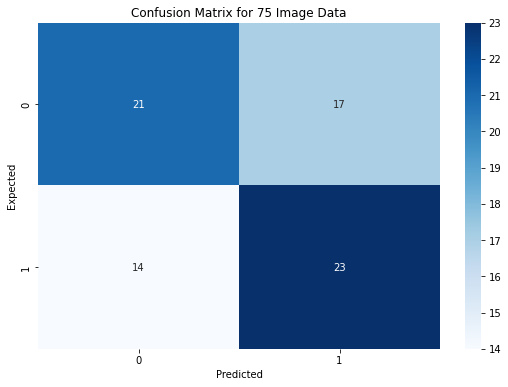

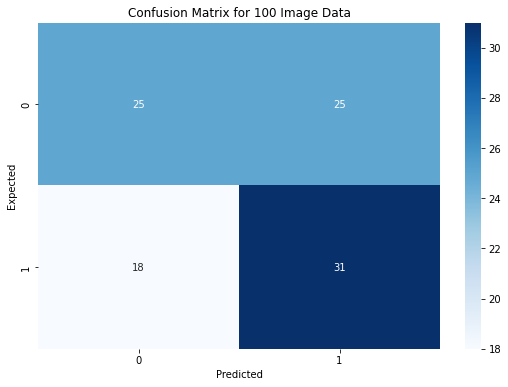

In [ ]:
import seaborn
image_predicted = image_model.predict(validation_generator,20)
predicted_image_labels = image_predicted > 0.5

length = numpy.size(predicted_image_labels)
predicted_image_labels = predicted_image_labels.reshape(length, )

for count in range (1, 5):
  value = count * length // 4
  image_mid = 49
  image_start = image_mid-((value+1)//2)+1
  image_end = image_mid+((value+1)//2)
  confusion_matrix = tf.math.confusion_matrix(labels=validation_generator.labels[image_start:image_end],predictions=predicted_image_labels[image_start:image_end])

  confusion_numpy = confusion_matrix.numpy()
  confidence_accuracy = (confusion_numpy[0, 0] + confusion_numpy[1, 1])/ numpy.sum(confusion_numpy) * 100
  print("Accuracy for", str(value), "Image Data = ", confidence_accuracy)

  plot.figure(figsize = (9,6))
  seaborn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plot.title("Confusion Matrix for " + str(value) + " Image Data")
  plot.xlabel('Predicted')
  plot.ylabel('Expected')

## Experiment


Saving COCO_train2014_9.jpg to COCO_train2014_9 (11).jpg
Saving documents (4).jpg to documents (4) (13).jpg
     COCO_train2014_9.jpg - Image is nonsensitive
documents (4).jpg - Image is sensitive


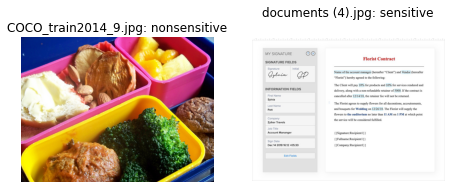

In [ ]:
from google.colab import files as f
from keras.preprocessing import image as img
fil = f.upload()
dict_result = dict()

for fval in fil.keys():

  source = '/content/' + fval
  img_arr=img.load_img(source, target_size=(150, 150))

  val = img.img_to_array(img_arr)
  val = numpy.expand_dims(val, axis=0)

  imgs = numpy.vstack([val])
  classification = image_model.predict(imgs, batch_size=10)
  if classification[0]>0.5:
    print(fval + " - Image is sensitive")
    dict_result[fval] = "sensitive" + '\n'
  else:
    print("     "+fval + " - Image is nonsensitive")
    dict_result[fval] = "nonsensitive"

plot.figure(figsize=(20,20))
   
for i, fval in enumerate(fil.keys()):
  img = plot.imread(fval)  
  plot.subplot(5, 5, i+1)
  plot.axis("off")
  plot.imshow(img)
  test = fval + ": " + dict_result[fval] 
  plot.title(test)

